In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import random

In [2]:
# Make dataset
x_orig = []
y_orig = np.zeros((1,120))
for i in range(0, 36):
    for j in range(i*120 + 1, i*120 + 121) :
        img = Image.open('dataset/{0}/pattern_{1}.jpg'.format(i, j)) 
        data = np.array(img)
        x_orig.append(data)
        
for i in range(1,36):
    y_orig = np.append(y_orig, np.full((1, 120),i), axis = 1)     
x_orig = np.array(x_orig)
y_orig = y_orig.T

In [3]:
print(x_orig.shape)
print(y_orig.shape)

(4320, 64, 64)
(4320, 1)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


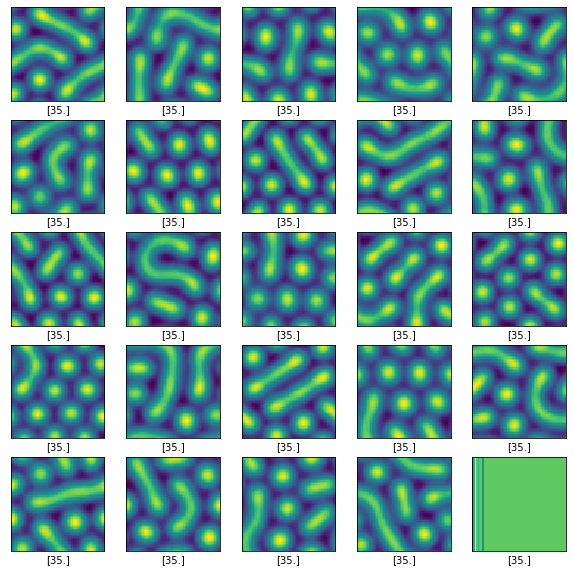

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(x_orig[i+4200,:] , [64,64])
    plt.imshow(image)
    plt.xlabel(y_orig[i+4200])
plt.show()

In [5]:
# Flatten the training and test images
x_flatten = x_orig.reshape(x_orig.shape[0], -1)

# Normalize image vectors
X = (2/255) * x_flatten - 1

# Explore dataset 
print ("number of examples = " + str(X.shape[0]))
print ("X shape: " + str(X.shape))
print ("Y shape: " + str(y_orig.shape))

number of examples = 4320
X shape: (4320, 4096)
Y shape: (4320, 1)


In [6]:
def gradient_vec(X):
    g_X_r = np.gradient(X, axis = 1)
    g_X_c = np.gradient(X, axis = 0)
    g_X = g_X_r**2 + g_X_c**2
    return g_X

In [17]:
X1 = np.var(X - X**3, axis=1)
X2 = np.mean(X, axis = 1)

In [18]:
X1 = X1.reshape((4320,1))
X2 = X2.reshape((4320,1))

print(X1.shape)
print(X2.shape)

(4320, 1)
(4320, 1)


In [19]:
plt.rcParams["figure.figsize"] = (25,14)

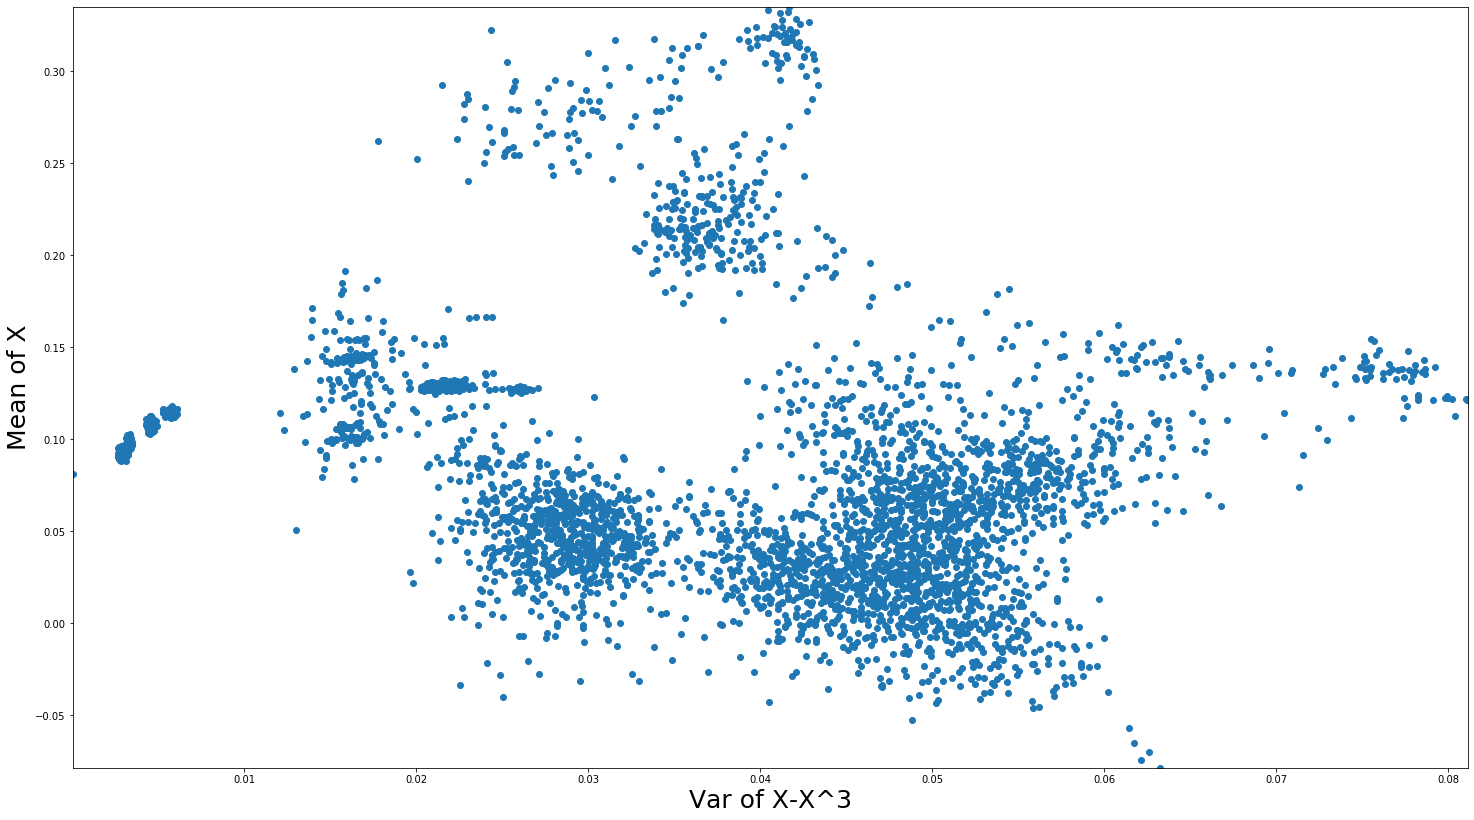

In [20]:
plt.scatter(X1, X2)
plt.axis([min(X1), max(X1), min(X2), max(X2)])
plt.xlabel("Var of X-X^3", fontsize = 25)
plt.ylabel("Mean of X", fontsize = 25)
plt.savefig('graph6/all.jpg', dpi=300)
plt.show()

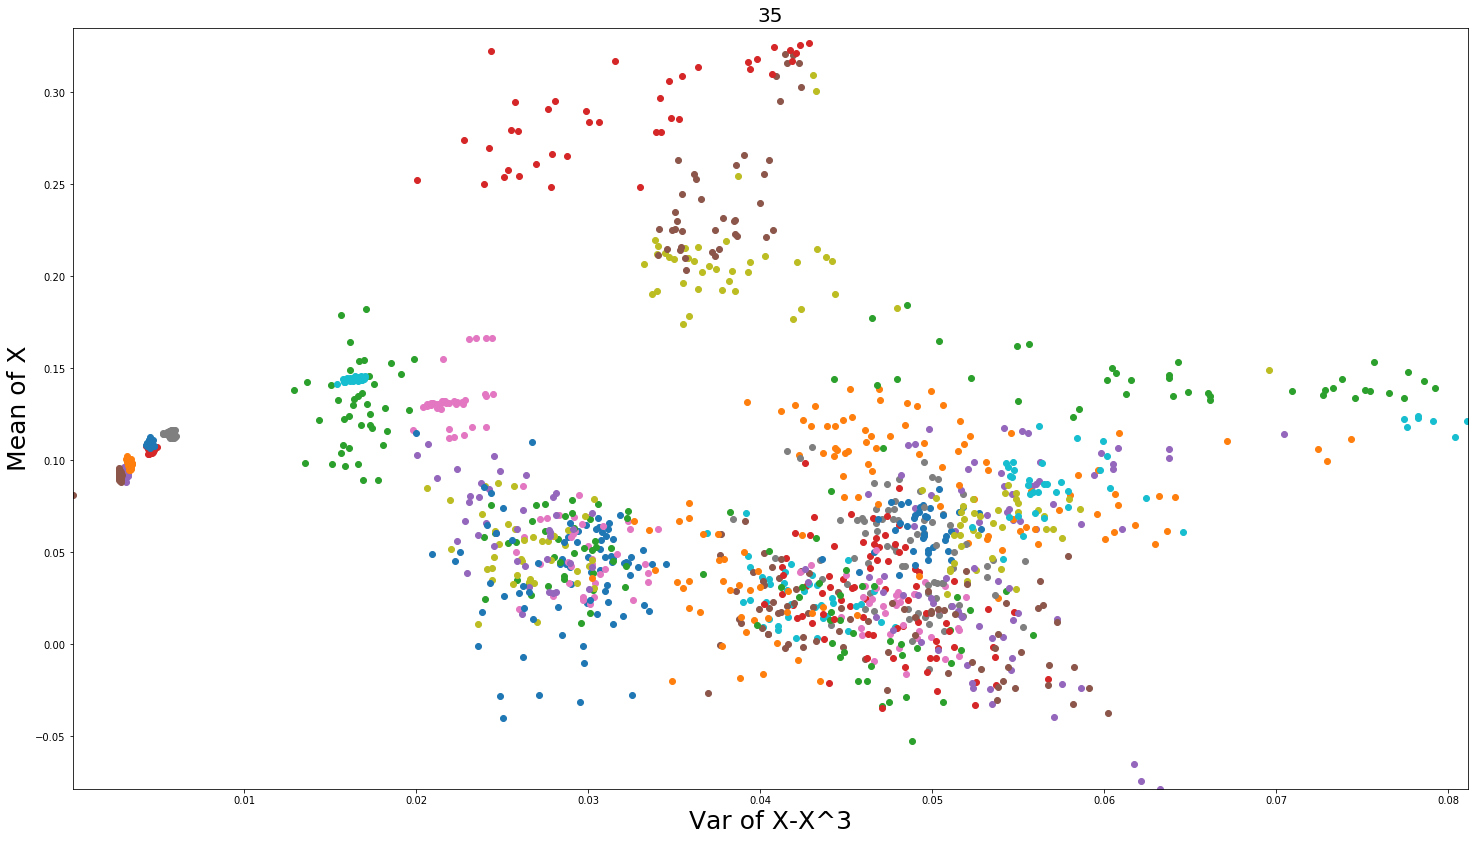

In [21]:
for i in range(36):   
    plt.axis([min(X1), max(X1), min(X2), max(X2)])
    plt.title(i, fontsize = 20)
    plt.scatter(X1[i*120:i*120+40], X2[i*120:i*120+40])
    plt.xlabel("Var of X-X^3", fontsize = 25)
    plt.ylabel("Mean of X", fontsize = 25)
    plt.savefig('graph6/{0}.jpg'.format(i), dpi=300)
plt.show()